<a href="https://colab.research.google.com/github/mervenurerdogan/BrainTumorClassification-CNN/blob/main/BrainTumorDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mervenurerdogan","key":"3e3cc8a3e22b8b6eb45256f2cb06503b"}'}

In [3]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d aryanfelix/brats-2019-traintestvalid

 78% 49.0M/62.9M [00:00<00:00, 33.0MB/s]
100% 62.9M/62.9M [00:01<00:00, 65.0MB/s]


In [5]:
from zipfile import ZipFile
file_name="brats-2019-traintestvalid.zip"

In [6]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.1MB/s 
     |████████████████████████████████| 194kB 51.5MB/s 
     |████████████████████████████████| 1.2MB 26.4MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 12.8MB 236kB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [8]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import PIL

In [9]:
train_dspath=Path("/content/dataset/train")
train_dspath.ls()

(#2) [Path('/content/dataset/train/no'),Path('/content/dataset/train/yes')]

In [10]:
train_imfiles=get_image_files(train_dspath)

In [11]:
im=PILImage.create(train_imfiles[0])
im.shape

(217, 232)

In [12]:
augments=[RandomResizedCrop(size=224, min_scale=0.75), Rotate(), Zoom()]
item_tfms=Resize(128,method='squish')


In [13]:
brains=DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_y=parent_label,
                 batch_tfms=augments,
                 item_tfms=item_tfms,
                 splitter=RandomSplitter(valid_pct=0.2,seed=68)
                 
                 
                 )
                 

In [14]:
dls=brains.dataloaders(train_imfiles,bs=64)

In [15]:
dls.c,len(dls.train_ds),len(dls.valid_ds)#valid ve train data sayımız

(2, 2240, 560)

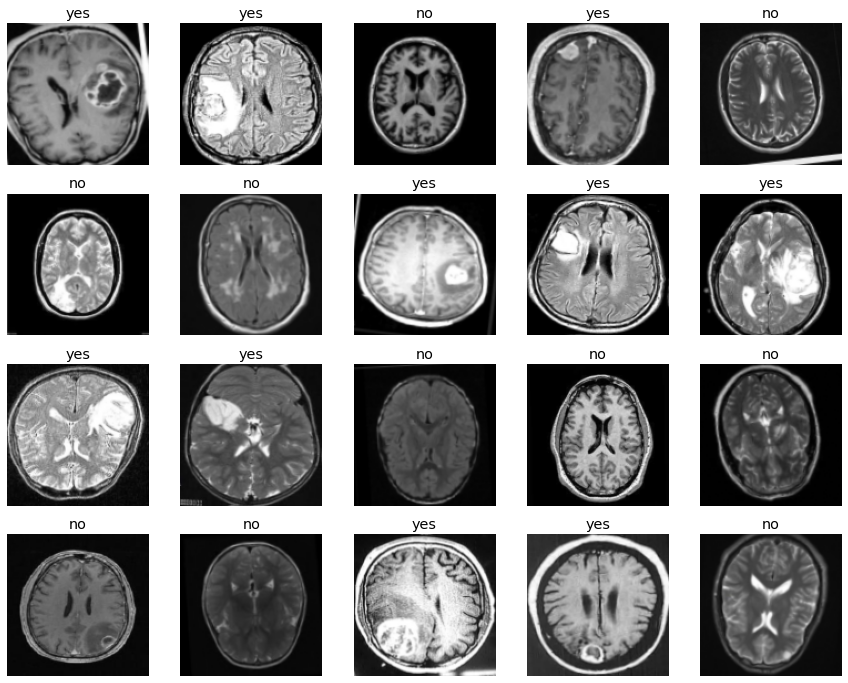

In [16]:
dls.show_batch(max_n=20)

In [17]:
learn=cnn_learner(dls,vgg16_bn,metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=7.585775847473997e-07)

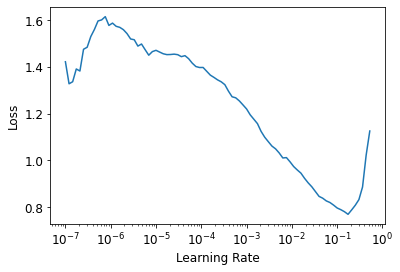

In [18]:
learn.lr_find()

In [19]:
learn.fit_one_cycle(30,1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.552597,0.280931,0.887500,0.112500,00:16
1,0.323594,0.083180,0.971429,0.028571,00:16
2,0.194978,0.072066,0.989286,0.010714,00:16
3,0.131318,0.134666,0.958929,0.041071,00:17
4,0.115544,0.187186,0.939286,0.060714,00:17
5,0.104455,0.030158,0.989286,0.010714,00:17
6,0.088005,0.139115,0.950000,0.050000,00:17
7,0.085530,0.082529,0.973214,0.026786,00:17
8,0.082950,0.028415,0.994643,0.005357,00:17
9,0.073886,0.394565,0.944643,0.055357,00:17


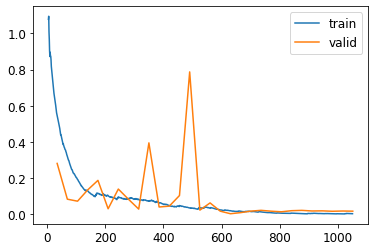

In [21]:
learn.recorder.plot_loss()

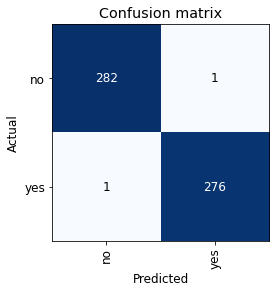

In [22]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

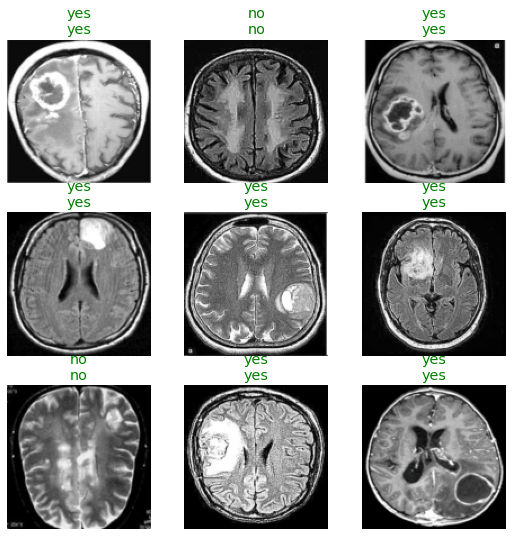

In [23]:
learn.show_results()

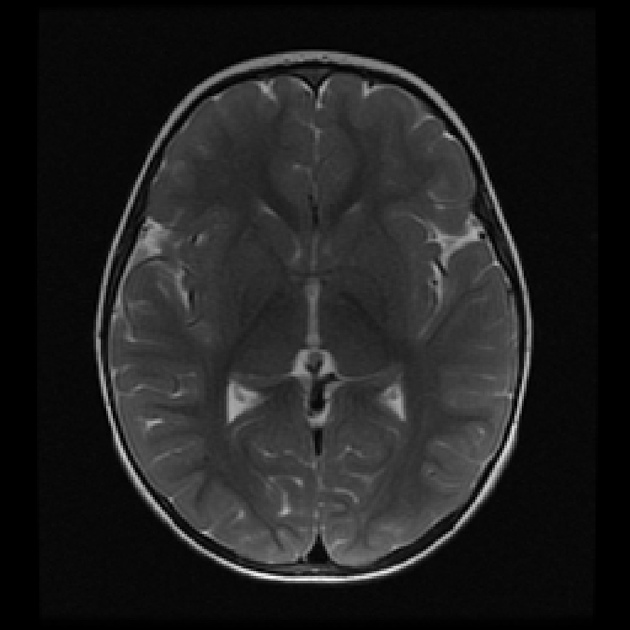

In [27]:
img=PILImage.create('/content/dataset/test/N1.jpeg')
img

In [28]:
learn.predict(im)

('no', tensor(0), tensor([1.0000e+00, 6.1872e-11]))

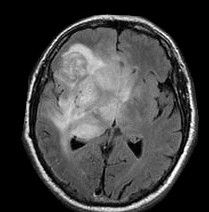

In [31]:
img2=PILImage.create('/content/dataset/test/Y2.jpg')
img2

In [33]:
learn.predict(img2)

('yes', tensor(1), tensor([1.0045e-08, 1.0000e+00]))

In [40]:
btn=widgets.FileUpload() #hali hazırda olan test datası dışında dışarıdan rastgele gelen data ile de test ediyoruz 
btn

FileUpload(value={}, description='Upload')

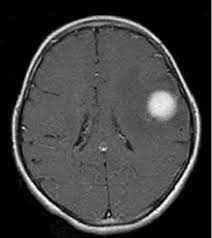

In [43]:
img_out=PILImage.create(btn.data[-1])
img_out

In [44]:
learn.predict(img_out)

('yes', tensor(1), tensor([2.7542e-10, 1.0000e+00]))

In [45]:
interp.print_classification_report()

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       283
         yes       1.00      1.00      1.00       277

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



In [46]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 128 x 128 
Conv2d                                    1792       False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36928      False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 128 x 64 x 64  
Conv2d                                    73856      False     
BatchNorm2d                               256        True      
ReLU                                                           
Conv2d                                    147584     False     
BatchNorm2d                               